In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
dataDir='..'
dataType='train2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir, dataType)

In [3]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=6.76s)
creating index...
index created!


**Note**, `cat` and `cats` stand for **category** and **categories** NOT for cat that is like a dog, but a cat.

In [4]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n\n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n\t{}'.format(' '.join(nms)))

COCO categories: 

person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
	kitchen animal vehicle electronic appliance accessory outdoor indoor furniture person sports food


In [5]:
# get all images containing given categories, select one at random
include_cats_names = ['person', 'dog', 'skateboard']
catIds = coco.getCatIds(catNms=include_cats_names)

imgIds = coco.getImgIds(catIds=catIds);
print('{} Images in the train set:'.format(include_cats_names), len(imgIds))

print('\nImage IDs:\n{}'.format(imgIds))

['person', 'dog', 'skateboard'] Images in the train set: 65

Image IDs:
[379520, 55809, 46978, 438915, 500100, 209028, 89350, 341623, 306440, 76937, 372874, 22796, 282768, 360595, 366484, 410005, 172310, 449560, 557721, 22427, 365340, 363549, 354721, 47909, 125351, 312233, 28842, 304173, 241837, 560561, 88754, 429236, 536244, 380724, 55478, 23737, 377278, 411583, 476736, 461632, 463044, 569158, 102599, 231240, 296782, 48595, 558036, 518613, 441470, 493020, 297692, 162396, 547421, 176229, 392166, 251368, 255209, 353644, 155117, 551795, 556149, 45175, 568187, 158718, 575615]


In [6]:
exclude_cats_names = ['car']
exclCatIDs = coco.getCatIds(catNms=exclude_cats_names)

imgIds = coco.getImgIds(catIds=catIds, exclCatIds=exclCatIDs)
print('Include images w/ {} and w/o {}.'.format(include_cats_names, exclude_cats_names))
print('Total in the {} set:'.format(dataType), len(imgIds))

print('\nImage IDs:\n{}'.format(imgIds))

Include images w/ ['person', 'dog', 'skateboard'] and w/o ['car'].
Total in the train2017 set: 50

Image IDs:
[55809, 46978, 438915, 209028, 89350, 341623, 306440, 76937, 372874, 22796, 282768, 366484, 410005, 172310, 449560, 557721, 22427, 365340, 354721, 47909, 312233, 28842, 241837, 560561, 88754, 429236, 536244, 380724, 55478, 23737, 377278, 411583, 476736, 461632, 569158, 48595, 558036, 518613, 162396, 176229, 392166, 251368, 255209, 353644, 155117, 551795, 556149, 45175, 568187, 158718]


In [7]:
s1 = set(coco.getImgIds(catIds=catIds))
s2 = set(coco.getImgIds(catIds=catIds, exclCatIds=exclCatIDs))

# excluding a category should result in getting a subset of image ids without the category excluded
assert s2.issubset(s1)

s1 - s2

{102599,
 125351,
 231240,
 296782,
 297692,
 304173,
 360595,
 363549,
 379520,
 441470,
 463044,
 493020,
 500100,
 547421,
 575615}

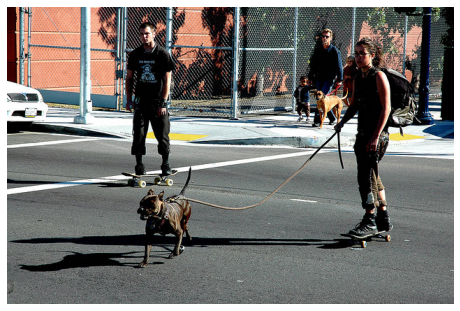

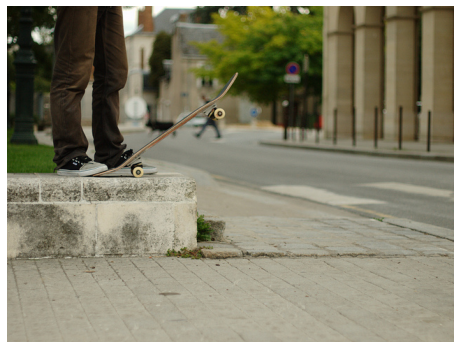

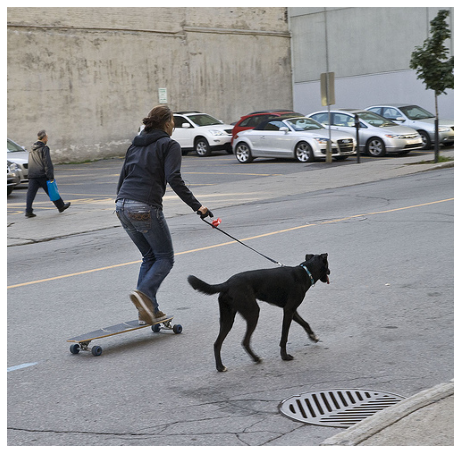

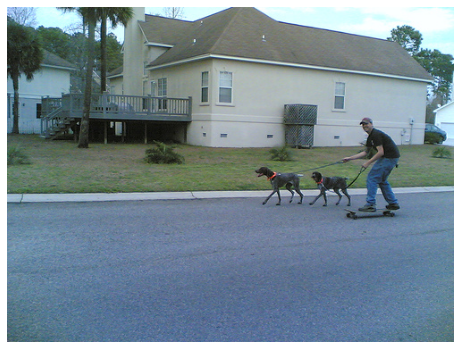

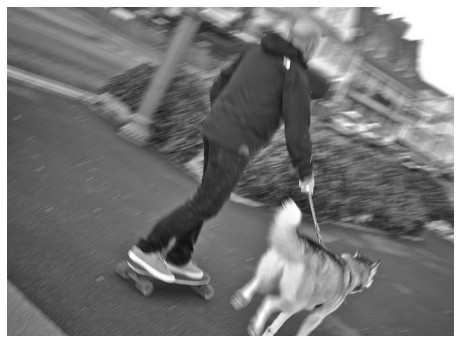

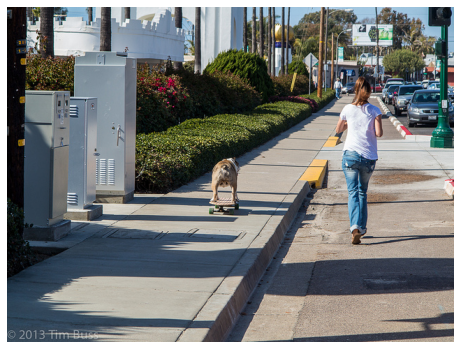

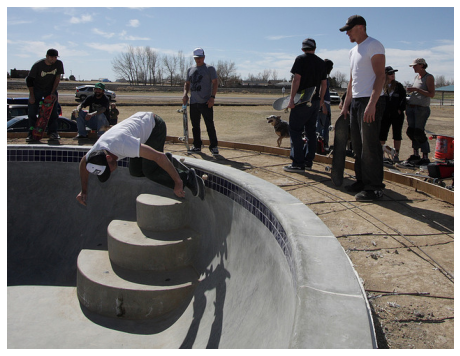

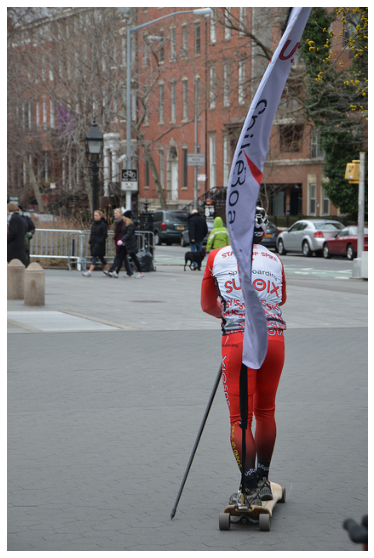

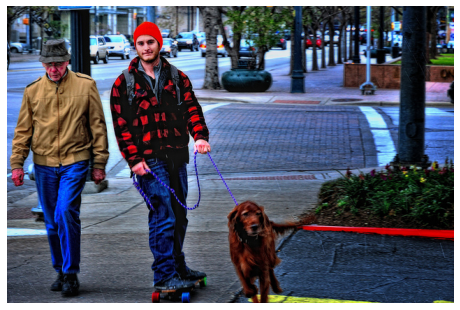

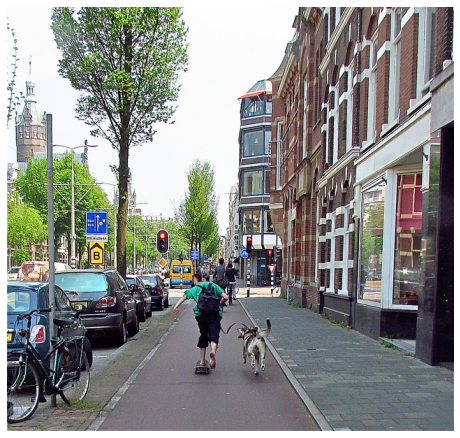

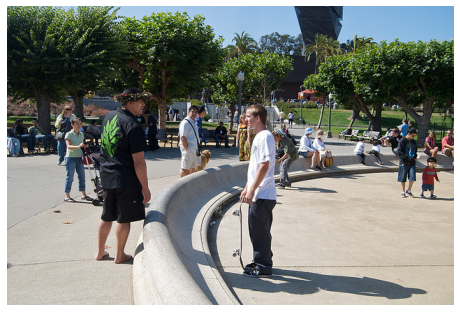

In [8]:
# print the images excluded, note, they all have ['person', 'dog', 'skateboard', car] and are excluded
# because they have ['car']

for i, sample_id in enumerate(s1 - s2):
    sample_img_info = coco.loadImgs(sample_id)[0]
    sample_img = io.imread("{}/images/{}/{}".format(dataDir, dataType, sample_img_info['file_name']))
    
    plt.axis('off')
    plt.imshow(sample_img)
    plt.show()
    
    if i == 10:
        break

In [9]:
# excluding some categories from the whole dataset
print(len(coco.getImgIds()), len(coco.getImgIds(exclCatIds=[16, 17]))) # 16 for 'dog', 17 for 'cat'

s1 = set(coco.getImgIds())
s2 = set(coco.getImgIds(exclCatIds=exclCatIDs)) # (all image ids) \ (union of image ids of the excluded categories)

# excluding a category should result in getting a subset of image ids without the category excluded
assert s2.issubset(s1)

print("\nThere were {} images excluded because they contained at least one of the excluded categories.".format(len(s1 - s2)))

118287 111009

There were 12251 images excluded because they contained at least one of the excluded categories.


In [10]:
# # we can subset if we do not like some of the oictures by selecting the IDs of the pictures we like
# # ids in the example below are a subset of ids 
#
# imgIds = coco.getImgIds(imgIds = [329219,404484,369541,419974,236166,462728,193162,193674,67213,554002])

# we can choose an id at random (seed set for reproducibility).
np.random.seed(42)
sample_id = imgIds[np.random.randint(0,len(imgIds))]

print('sample_id:', sample_id, '\n')

sample_img_info = coco.loadImgs(sample_id)[0]

print('Fields available:', list(sample_img_info.keys()), '\n')
for key, value in sample_img_info.items():
    print(key, (13-len(key))*' ', ':', value)

sample_id: 162396 

Fields available: ['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id'] 

license        : 1
file_name      : 000000162396.jpg
coco_url       : http://images.cocodataset.org/train2017/000000162396.jpg
height         : 426
width          : 640
date_captured  : 2013-11-18 11:06:03
flickr_url     : http://farm6.staticflickr.com/5309/5653850686_0b543d8cd6_z.jpg
id             : 162396


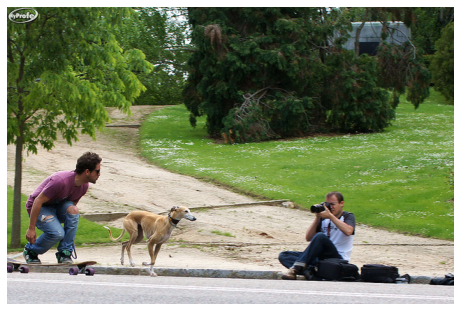

In [11]:
# load and display image

# sample_img = io.imread('%s/images/%s/%s'%(dataDir,dataType,sample_img_info['file_name']))
# 
# or
#
# # in f-string notation
# print(f"{dataDir}/images/{dataType}/{sample_img_info['file_name']}")
# sample_img = io.imread(f"{dataDir}/images/{dataType}/{sample_img_info['file_name']}")
#
# or
#
# use url to load image
sample_img = io.imread(sample_img_info['coco_url'])


plt.axis('off')
plt.imshow(sample_img)
plt.show()

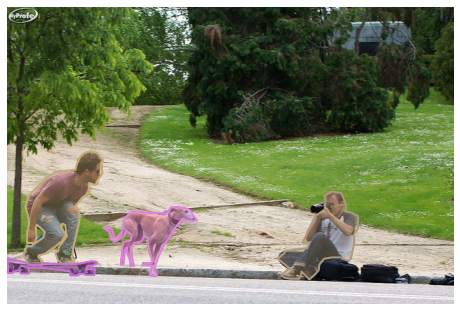

In [12]:
# load and display instance annotations
plt.imshow(sample_img); plt.axis('off')
annIds = coco.getAnnIds(imgIds=sample_img_info['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [13]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=3.48s)
creating index...
index created!


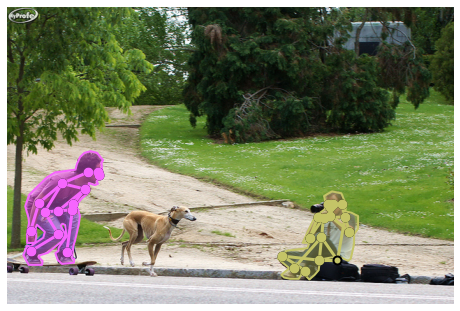

In [14]:
# load and display keypoints annotations
plt.imshow(sample_img); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=sample_img_info['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [15]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.37s)
creating index...
index created!


A man riding a skateboard next to his dog as another man takes a picture of them.
A man is sitting on a curb taking a picture of a skateboarder and a dog.
A dog walking along a man on a skate board, while another man on the side walk holds up a camera.
A person sitting on the side of the road taking a picture of a man riding a skateboard next to a dog.
The man on the skateboard and the dog are getting their picture taken.


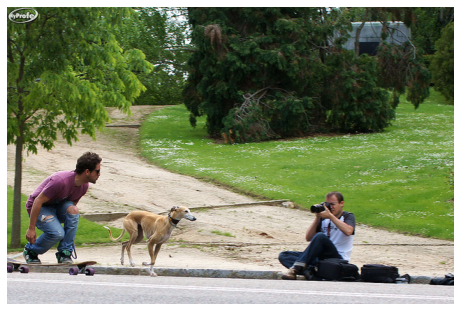

In [16]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=sample_img_info['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(sample_img); plt.axis('off'); plt.show()